# Activity: Matrix Algebra and 2D Transformations in Python

In this educational notebook, we will work with two applications of linear algebra:

1.  **Solving systems of linear equations** using matrix algebra.
2.  **Applying 2D linear transformations**: rotations and scaling on points.

We will use `NumPy` functions like `np.linalg.solve` and `np.linalg.lstsq` to solve these systems, and transformation matrices to see how points are modified in the plane.


In [1]:
import sys
import os

# Add the project root to the Python path
# This allows us to import modules from the src directory
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.linear_system import solve_linear_system
from src.transformations import apply_transformations
from src.visualization import plot_transformations

In [2]:
import yaml

# Load configuration from YAML file
with open('../config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Extract transformation parameters
TRANSFORMATION_PARAMS = config['transformations']
ANGLE = TRANSFORMATION_PARAMS['angle_degrees']
SCALE = TRANSFORMATION_PARAMS['scale_factor']

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

## 1) Solving a System of Linear Equations

A system of linear equations can be represented in matrix form as:

$$A \cdot x = b
$$

Where:
- $A$ is the coefficient matrix,
- $x$ is the vector of variables (unknowns),
- $b$ is the vector of observations (results).

In this activity, we will use two different methods:
- `np.linalg.solve(A, b)`: to find an **exact solution**, provided the matrix is square and has an inverse.
- `np.linalg.lstsq(A, b)`: in cases where the system has no exact solution (because it is under- or over-determined), we will find an **approximate solution** using least squares.

The system of equations to be solved is as follows:

$$
\begin{bmatrix}
5 & -1 & 7 \\
1 & -7 & 1 \\
2 & 1 & 4 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
=
\begin{bmatrix}
4 \\
6 \\
3 \\
\end{bmatrix}
$$

The result will be the vector $x$ that satisfies this equation.


As a demonstration, we will create a function that solves this system of equations using both methods and compares the results:

In [4]:
# Define the system
# A = np.array([[5, -1, 7],
#               [1, -7, 1],
#               [2, 1, 4]], dtype=float)

A = np.array([[3, -1, 2],
              [1, 2, 1],
              [2, 1, 3]], dtype=float)

b = np.array([5, 6, 7], dtype=float)

In [5]:
# Determinant of matrix A
print(np.linalg.det(A))

10.000000000000002


In [6]:
x_solve, x_lstsq = solve_linear_system(A, b)

Coefficient Matrix A:
 [[ 3. -1.  2.]
 [ 1.  2.  1.]
 [ 2.  1.  3.]]
Vector b:
 [5. 6. 7.]

Solution with np.linalg.solve:
[2.  1.8 0.4]

Solution with np.linalg.lstsq (least squares):
[2.  1.8 0.4]

Are both solutions equal? Yes


## 2) Applying 2D Linear Transformations

In this step, we will apply classic linear transformations to a set of points in the 2D plane. The transformations we will perform are:

- **Rotation**: rotating the points around the origin (0, 0) by 45°.
- **Scaling**: increasing the size of the figures with a scale factor of 1.5 in both x and y directions.

Both transformations are represented by **matrices**, and their combined effect is achieved by multiplying these matrices:

### Transformation Matrices

- **2D Rotation** (angle $\theta$):
$$
R(\theta) = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
$$

- **Scaling** (factor $ s = 1.5 $):
$$
S = \begin{bmatrix}
1.5 & 0 \\
0 & 1.5
\end{bmatrix}
$$

- **Composite Transformation**: in linear algebra, operations are performed from right to left, so we first rotate ($R$) and then scale ($S$).
$$
T = S \cdot R
$$

### Set of Points

We will use the following set of points as an example:
$$
M = \begin{bmatrix}
1 & 2 \\
3 & 1 \\
2 & 4 \\
4 & 3 \\
0 & 0 \\
3 & 3
\end{bmatrix}
$$

In [7]:
# 6x2 Matrix of points
original_points = np.array([
    [1, 2],
    [3, 1],
    [2, 4],
    [4, 3],
    [0, 0],
    [3, 3]
], dtype=float)

In [8]:
rotated_points, scaled_points, composite_points = apply_transformations(
    original_points, 
    angle_deg=ANGLE, 
    scale_factor=SCALE
)

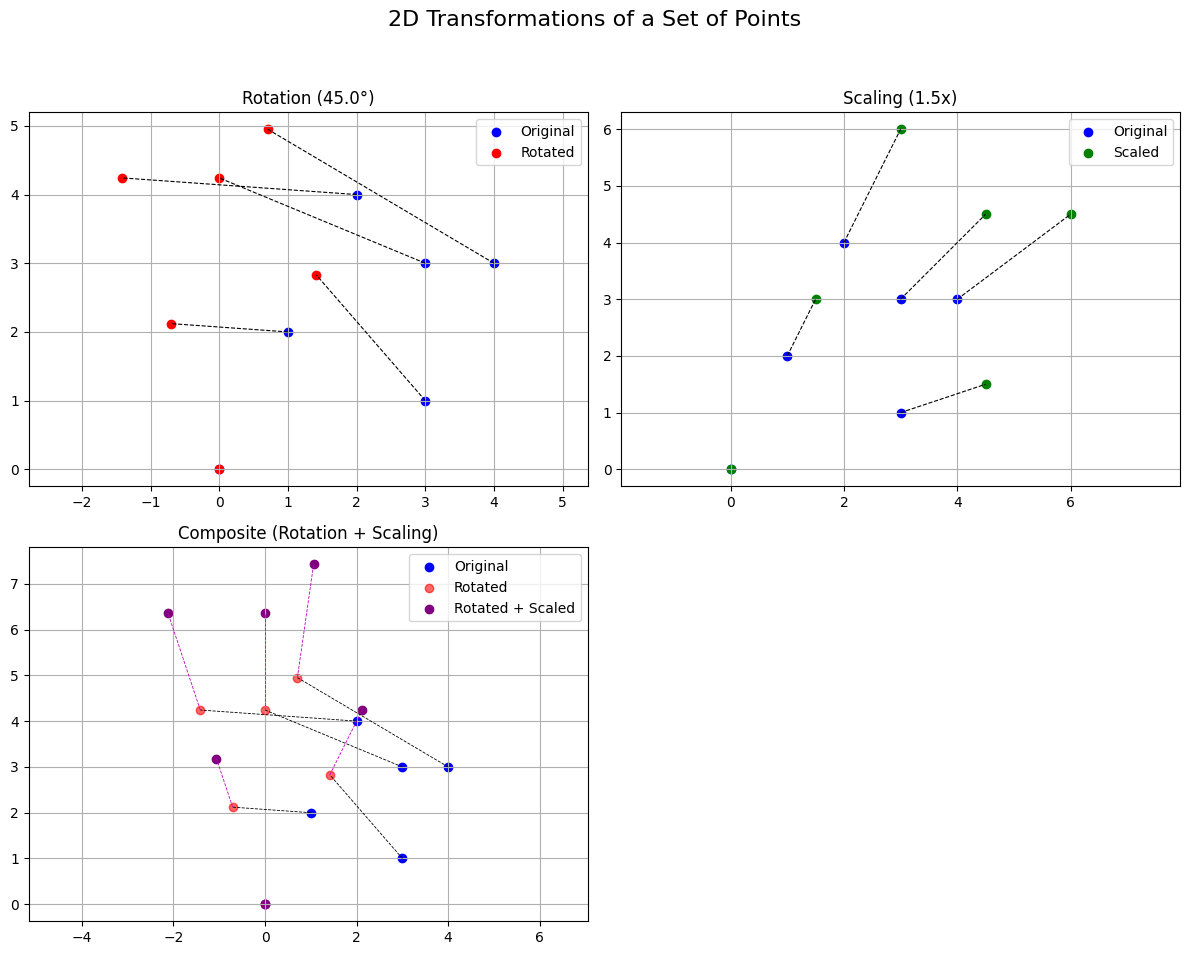

In [9]:
plot_transformations(
    original_points, 
    rotated_points, 
    scaled_points, 
    composite_points,
    angle_deg=ANGLE,
    scale_factor=SCALE
)